# Privacy risk assessment in text mining

## Preprocessing

We load onlt the message column of the dataset as downloaded from Kaggle:

In [1]:
from pandas import read_csv
original = read_csv("./datasets/emails.csv", usecols=[1], engine="c")
original

message
0       Message-ID: <18782981.1075855378110.JavaMail.e...
1       Message-ID: <15464986.1075855378456.JavaMail.e...
2       Message-ID: <24216240.1075855687451.JavaMail.e...
3       Message-ID: <13505866.1075863688222.JavaMail.e...
4       Message-ID: <30922949.1075863688243.JavaMail.e...
...                                                   ...
517396  Message-ID: <26807948.1075842029936.JavaMail.e...
517397  Message-ID: <25835861.1075842029959.JavaMail.e...
517398  Message-ID: <28979867.1075842029988.JavaMail.e...
517399  Message-ID: <22052556.1075842030013.JavaMail.e...
517400  Message-ID: <28618979.1075842030037.JavaMail.e...

[517401 rows x 1 columns]

Now we extract from the column all the informations needed:

In [2]:
from enron_preprocessing import enron_dataframe

df = enron_dataframe(original["message"])
df

Email  \
0       phillip.allen@enron.com   
1       phillip.allen@enron.com   
2       phillip.allen@enron.com   
3       phillip.allen@enron.com   
4       phillip.allen@enron.com   
...                         ...   
230566  john.zufferli@enron.com   
230567  john.zufferli@enron.com   
230568  john.zufferli@enron.com   
230569  john.zufferli@enron.com   
230570  john.zufferli@enron.com   

                                                  Message  
0                                    here is our forecast  
1       traveling to have a business meeting takes the...  
2                          test successful.  way to go!!!  
3       randy,\n\n can you send me a schedule of the s...  
4                       let's shoot for tuesday at 11:45.  
...                                                   ...  
230566                  very busy, jess is ok just scared  
230567  this is a trade with oil-spec-hedge-ng (john l...  
230568  some of my position is with the alberta term b...  
230569  analyst\t\t\t\t\trank\n\nstephane brodeur\t\t\...  
230570  i think the ymca has a class that is for peopl...  

[230571 rows x 2 columns]

We decide to limit the analysis to the messages coming from authors with an account in the `enron.com` domain.

In [3]:
df = df[df["Email"].str.endswith("enron.com")]
df

Email  \
0       phillip.allen@enron.com   
1       phillip.allen@enron.com   
2       phillip.allen@enron.com   
3       phillip.allen@enron.com   
4       phillip.allen@enron.com   
...                         ...   
230566  john.zufferli@enron.com   
230567  john.zufferli@enron.com   
230568  john.zufferli@enron.com   
230569  john.zufferli@enron.com   
230570  john.zufferli@enron.com   

                                                  Message  
0                                    here is our forecast  
1       traveling to have a business meeting takes the...  
2                          test successful.  way to go!!!  
3       randy,\n\n can you send me a schedule of the s...  
4                       let's shoot for tuesday at 11:45.  
...                                                   ...  
230566                  very busy, jess is ok just scared  
230567  this is a trade with oil-spec-hedge-ng (john l...  
230568  some of my position is with the alberta term b...  
230569  analyst\t\t\t\t\trank\n\nstephane brodeur\t\t\...  
230570  i think the ymca has a class that is for peopl...  

[176243 rows x 2 columns]

Let's inspect the distribution of the word

In order to be processed by LIWC2015 we have to re-save the dataset in CSV format:

In [4]:
df.to_csv("./datasets/enron-preprocessed.csv")

## Feature selection

We now load the CSV file outputted from LIWC, renaming the columns and index:

In [5]:
from pandas import read_csv
from enron_preprocessing import liwc_dataframe_preprocessing

df = read_csv("./datasets/enron-liwc.csv", engine="c", index_col=0)
liwc_dataframe_preprocessing(df)
df

Email   WC  Analytic  Clout  Authentic   Tone  \
ID                                                                        
0       phillip.allen@enron.com    4      1.00  99.00       1.00  25.77   
1       phillip.allen@enron.com  139     66.19  52.88      30.77  87.46   
2       phillip.allen@enron.com    5     99.00  50.00      99.00  99.00   
3       phillip.allen@enron.com   34     95.58  96.11      66.34  25.77   
4       phillip.allen@enron.com    7     99.00  99.00      89.63  25.77   
...                         ...  ...       ...    ...        ...    ...   
230566  john.zufferli@enron.com    7      5.89  50.00      13.15  25.77   
230567  john.zufferli@enron.com   69     93.26  50.00       1.00  52.99   
230568  john.zufferli@enron.com   23     60.05  50.00      98.89  25.77   
230569  john.zufferli@enron.com   27     93.26  50.00       1.00  25.77   
230570  john.zufferli@enron.com   20     66.46  30.86      15.86   1.00   

          WPS  Sixltr     Dic  function  ...  Comma  Colon  SemiC  QMark  \
ID                                       ...                               
0        4.00   25.00   75.00     75.00  ...   0.00   0.00    0.0    0.0   
1       13.90   21.58   93.53     53.24  ...   0.72   0.00    0.0    0.0   
2        2.50   20.00  100.00     20.00  ...   0.00   0.00    0.0    0.0   
3       11.33   20.59   85.29     52.94  ...   2.94   0.00    0.0    0.0   
4        7.00   14.29   57.14     42.86  ...   0.00  14.29    0.0    0.0   
...       ...     ...     ...       ...  ...    ...    ...    ...    ...   
230566   7.00    0.00   85.71     42.86  ...  14.29   0.00    0.0    0.0   
230567  69.00    5.80   24.64      8.70  ...   5.80   0.00    0.0    0.0   
230568  23.00   17.39   91.30     60.87  ...   4.35   0.00    0.0    0.0   
230569  27.00   14.81   18.52      0.00  ...   0.00   0.00    0.0    0.0   
230570  20.00   20.00   90.00     60.00  ...   0.00   0.00    0.0    0.0   

        Exclam   Dash  Quote  Apostro  Parenth  OtherP  
ID                                                      
0          0.0   0.00    0.0     0.00     0.00    0.00  
1          0.0   0.00    0.0     0.72     0.00    0.00  
2         60.0   0.00    0.0     0.00     0.00    0.00  
3          0.0   0.00    0.0     0.00     5.88    0.00  
4          0.0   0.00    0.0    14.29     0.00    0.00  
...        ...    ...    ...      ...      ...     ...  
230566     0.0   0.00    0.0     0.00     0.00    0.00  
230567     0.0  18.84    0.0     2.90     2.90   11.59  
230568     0.0   0.00    0.0     0.00     0.00    0.00  
230569     0.0   0.00    0.0     0.00     0.00    0.00  
230570     0.0   5.00    0.0     0.00     0.00    0.00  

[176207 rows x 94 columns]

Let's inspect the distribution of the number of words in the dataset:

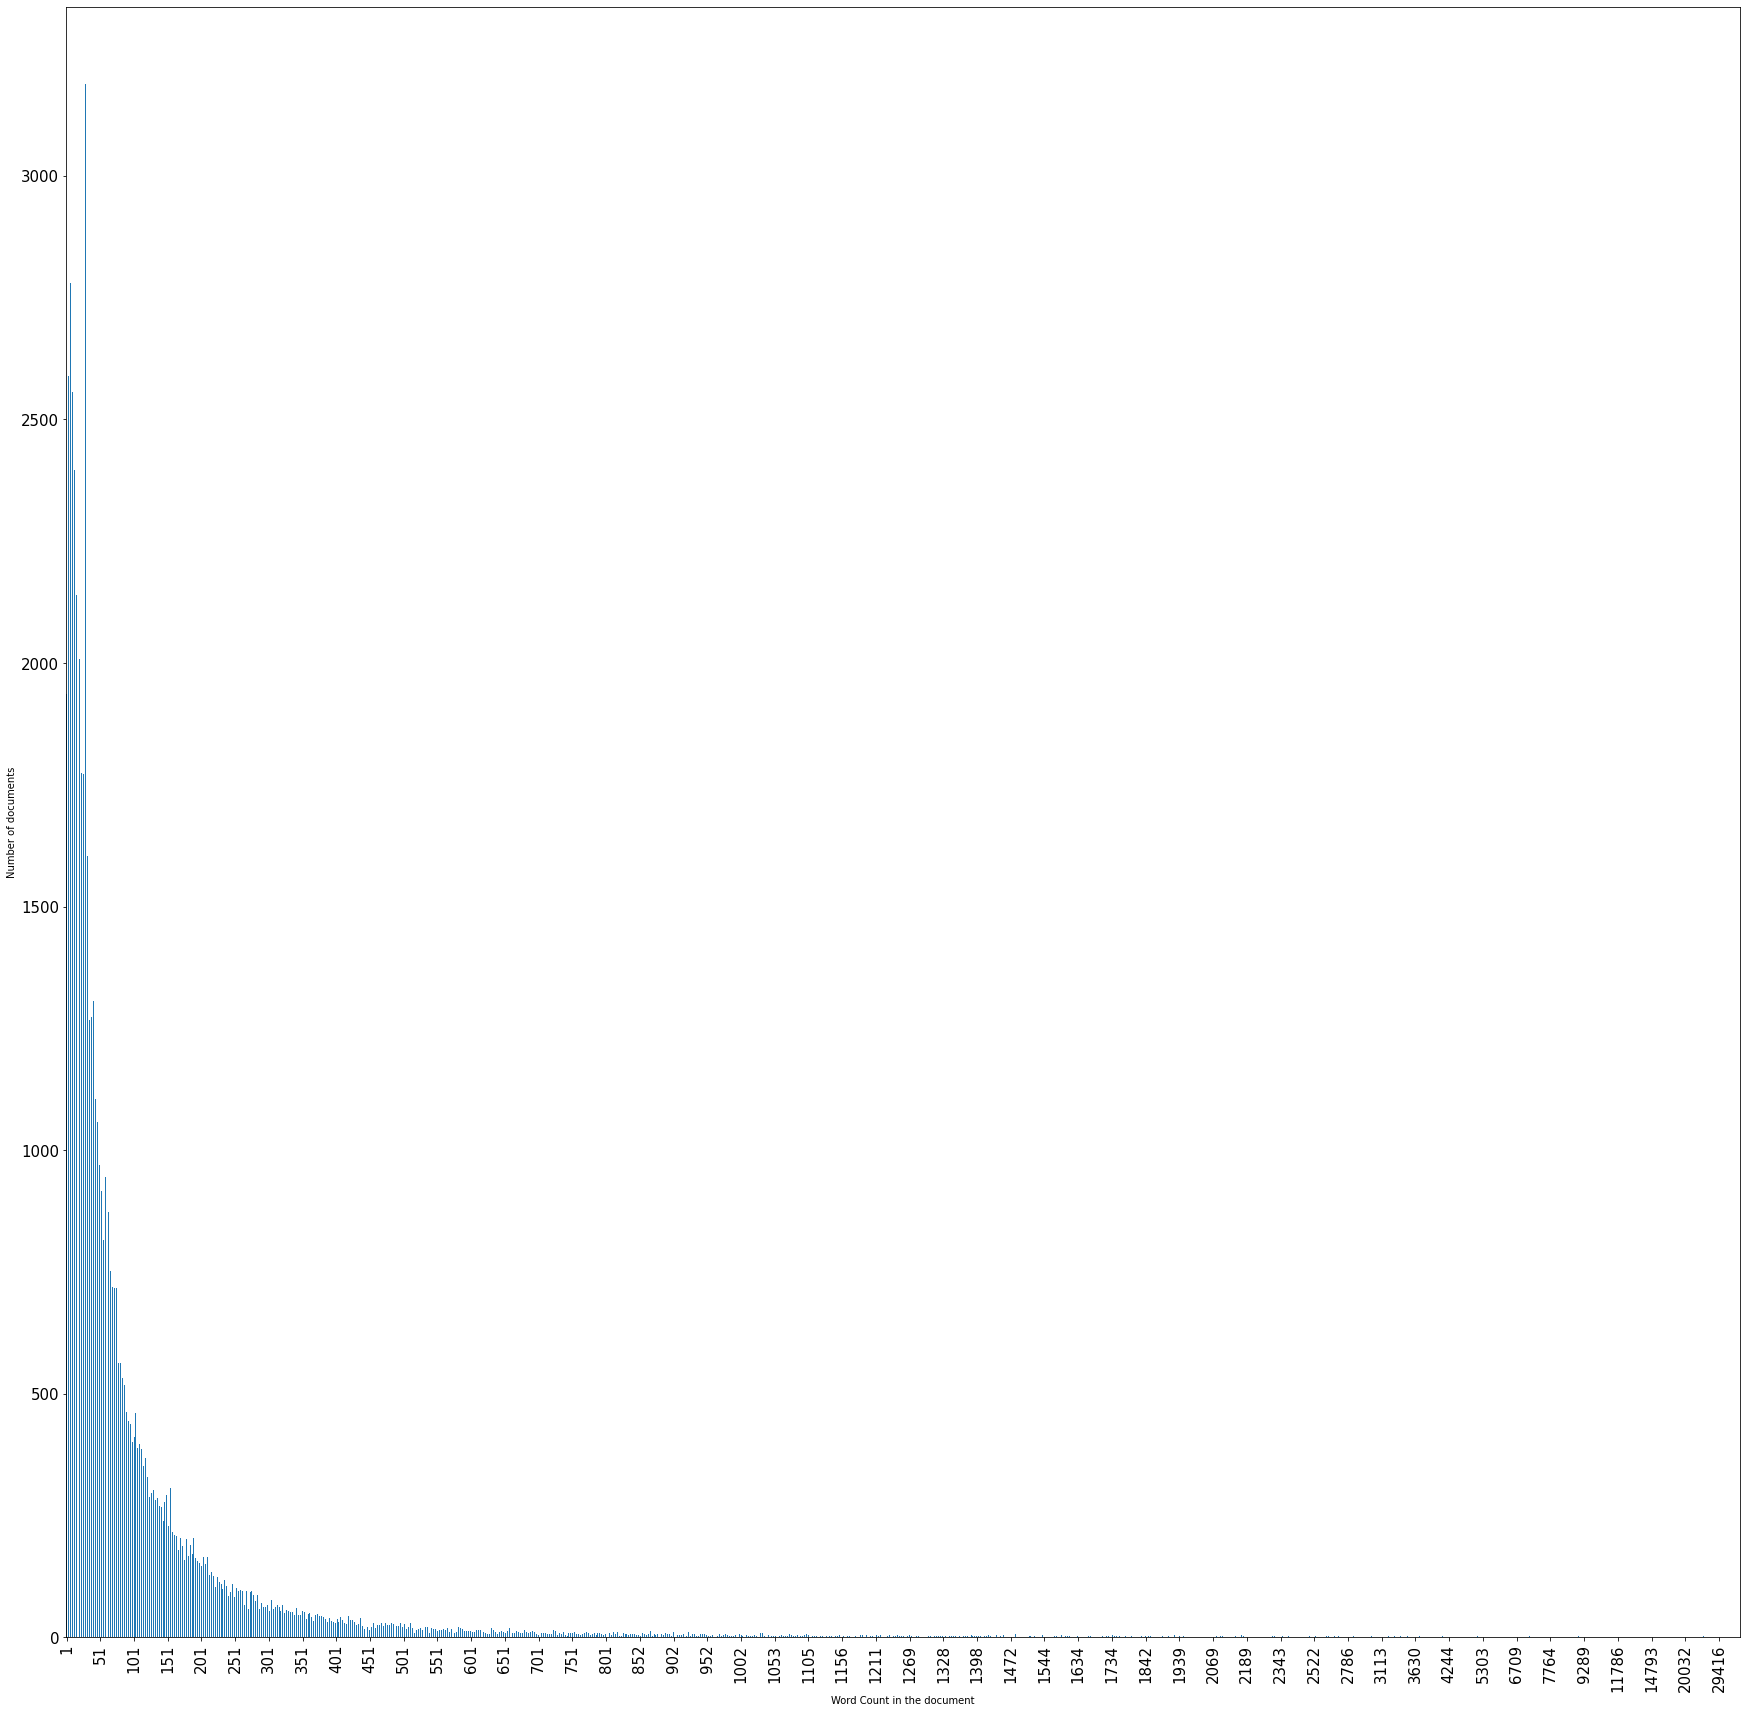

In [6]:
from numpy import linspace
from matplotlib.pyplot import locator_params, savefig

count = df["WC"].value_counts().sort_index()

count.plot.bar(
    xlabel = "Word Count in the document",
    ylabel = "Number of documents",
    figsize = (30, 30),
    fontsize = 15
)
locator_params(axis="x", nbins=50)
savefig("./wc_dist.png")

<AxesSubplot:title={'center':'Word Count (WC) distribution from 20 to 40'}, xlabel='Word Count in the document', ylabel='Number of documents'>

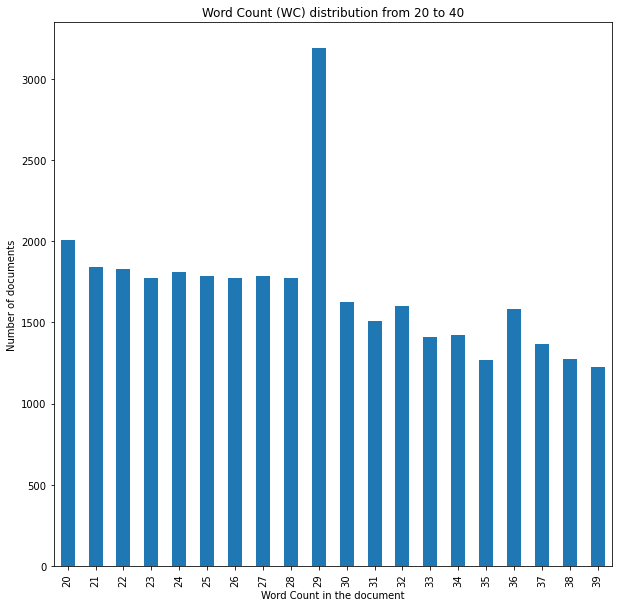

In [7]:
count[(count.index >= 20) & (count.index < 40)].plot.bar(
    title = "Word Count (WC) distribution from 20 to 40",
    xlabel = "Word Count in the document",
    ylabel = "Number of documents",
    figsize = (10, 10)
)

We observe a really skewed distribution, with many documents with one word and a decreasing number of texts with 2, 3 and more words. Most importantly, we notice an unusual outlier in the curve:

In [8]:
count[count == count.max()]

29    3188
Name: WC, dtype: int64

We have 1042 documents with just one word and only 66 documents with more than 800 words, the points where the curve flattens:

In [9]:
display(count[count == 1].count())
display(count[count > 800].count())

1042

66

### Features discretisation

We discretise the features into equal-frequency buckets. The number of buckets is computed using the Sturges' formula:
$$
    h = 1 + \frac{10}{3}\log_{10}(n)
$$

In [10]:
from autobinner import equal_frequency

df = equal_frequency(df, excluded_columns=["Email"])
df

Email  WC  Analytic  Clout  Authentic  Tone  WPS  \
ID                                                                           
0       phillip.allen@enron.com   0         0     20          0     1    1   
1       phillip.allen@enron.com  19         7      4         11    10   14   
2       phillip.allen@enron.com   1        22      3         20    14    0   
3       phillip.allen@enron.com  10        19     19         16     1   10   
4       phillip.allen@enron.com   2        22     20         18     1    4   
...                         ...  ..       ...    ...        ...   ...  ...   
230566  john.zufferli@enron.com   2         1      3          7     1    4   
230567  john.zufferli@enron.com  15        17      3          0     4   24   
230568  john.zufferli@enron.com   7         6      3         20     1   21   
230569  john.zufferli@enron.com   8        17      3          0     1   22   
230570  john.zufferli@enron.com   6         7      2          8     0   19   

        Sixltr  Dic  function  ...  Comma  Colon  SemiC  QMark  Exclam  Dash  \
ID                             ...                                             
0           17   13        23  ...      0      0      0      0       0     0   
1           14   23        19  ...      0      0      0      0       0     0   
2           12   23         2  ...      0      0      0      0       2     0   
3           13   19        18  ...      4      0      0      0       0     0   
4            6    6        12  ...      0     10      0      0       0     0   
...        ...  ...       ...  ...    ...    ...    ...    ...     ...   ...   
230566       0   20        12  ...     16      0      0      0       0     0   
230567       0    0         1  ...     11      0      0      0       0    12   
230568       9   22        22  ...      8      0      0      0       0     0   
230569       6    0         0  ...      0      0      0      0       0     0   
230570      12   22        21  ...      0      0      0      0       0     8   

        Quote  Apostro  Parenth  OtherP  
ID                                       
0           0        0        0       0  
1           0        1        0       0  
2           0        0        0       0  
3           0        0        6       0  
4           0        9        0       0  
...       ...      ...      ...     ...  
230566      0        0        0       0  
230567      0        6        3       8  
230568      0        0        0       0  
230569      0        0        0       0  
230570      0        0        0       0  

[176207 rows x 94 columns]

### Correlation matrix

We compute the correlation matrix for the dataset.

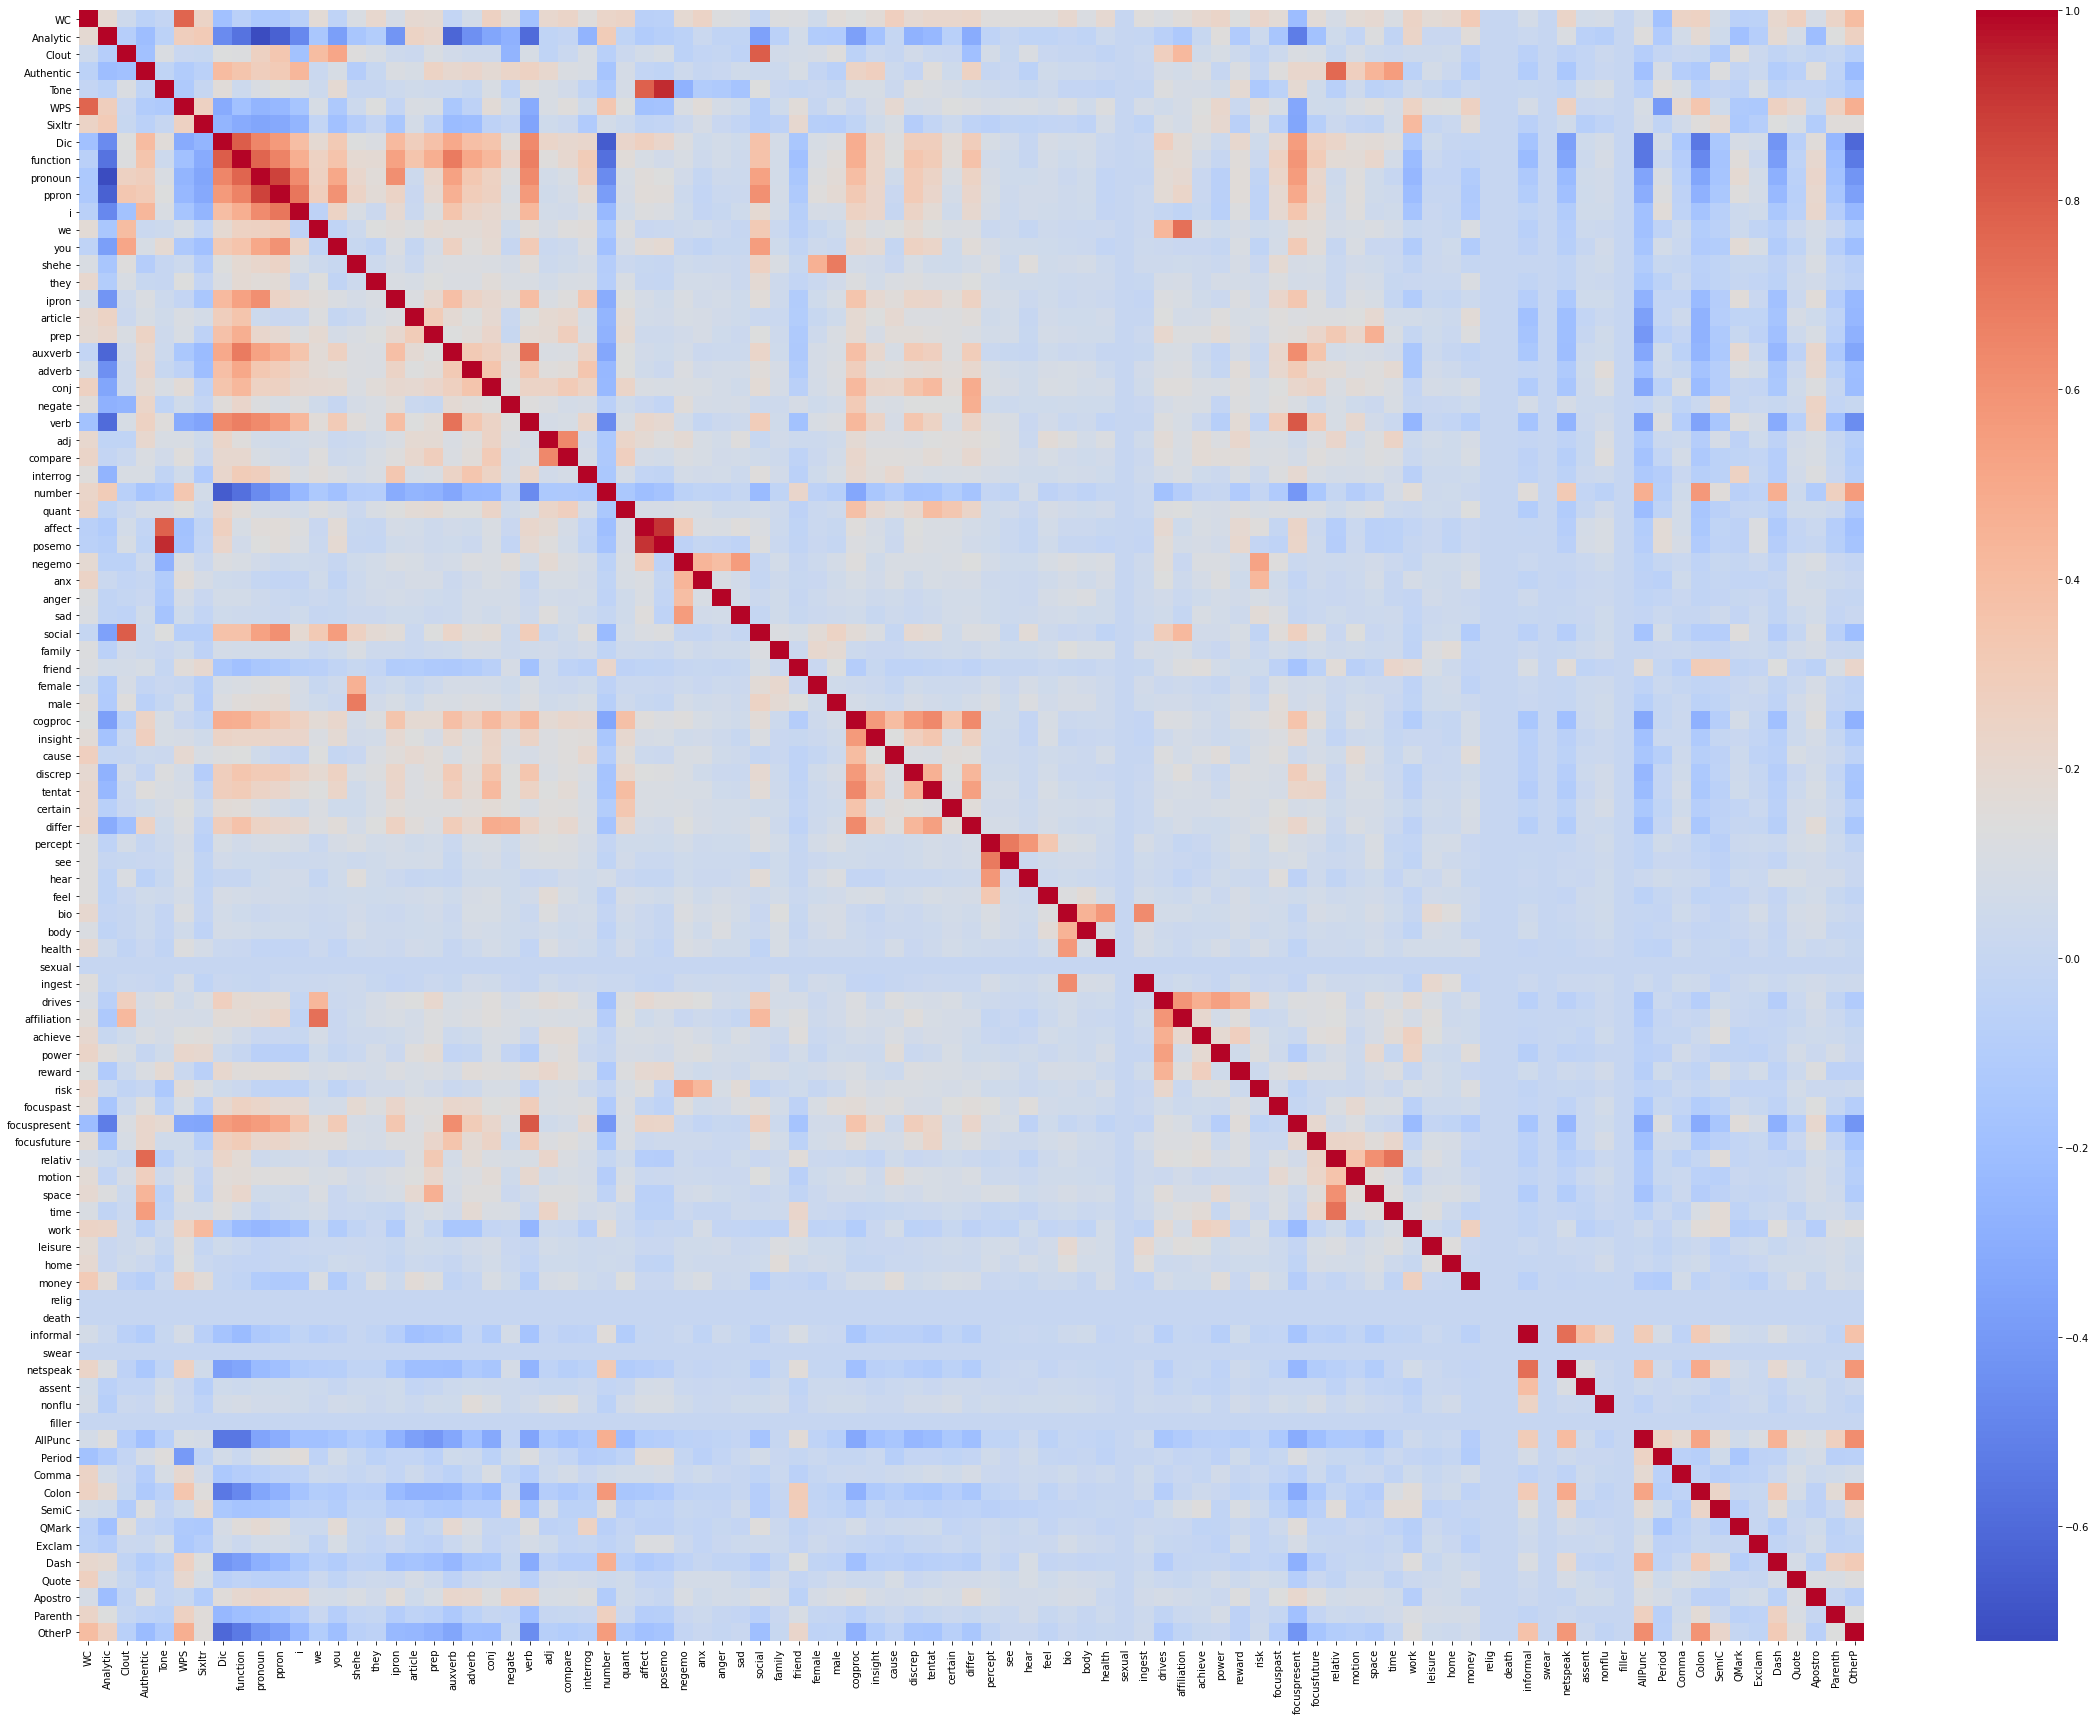

In [11]:
from matplotlib.pyplot import figure, savefig
import seaborn as sns

figure(figsize=(40, 30))

sns.heatmap(df.corr().fillna(0), annot = False, cmap= 'coolwarm')

savefig("./correlation.png")

Since a plot of the matrix itself is not enough to show the most correlated features, we extract the couples of features

In [12]:
from autobinner import most_correlated
most_corr = most_correlated(df)
most_corr

Tone          posemo          0.939187
pronoun       ppron           0.873313
ppron         pronoun         0.873313
verb          focuspresent    0.809799
affect        posemo          0.913267
posemo        Tone            0.939187
              affect          0.913267
focuspresent  verb            0.809799
dtype: float64

For this reason we decide to drop the `Tone`, `affect`, `ppron`, `focuspresent` columns.

In [13]:
df.drop(columns=["Tone", "affect", "ppron", "focuspresent"], inplace=True)
df

Email  WC  Analytic  Clout  Authentic  WPS  Sixltr  \
ID                                                                             
0       phillip.allen@enron.com   0         0     20          0    1      17   
1       phillip.allen@enron.com  19         7      4         11   14      14   
2       phillip.allen@enron.com   1        22      3         20    0      12   
3       phillip.allen@enron.com  10        19     19         16   10      13   
4       phillip.allen@enron.com   2        22     20         18    4       6   
...                         ...  ..       ...    ...        ...  ...     ...   
230566  john.zufferli@enron.com   2         1      3          7    4       0   
230567  john.zufferli@enron.com  15        17      3          0   24       0   
230568  john.zufferli@enron.com   7         6      3         20   21       9   
230569  john.zufferli@enron.com   8        17      3          0   22       6   
230570  john.zufferli@enron.com   6         7      2          8   19      12   

        Dic  function  pronoun  ...  Comma  Colon  SemiC  QMark  Exclam  Dash  \
ID                              ...                                             
0        13        23       20  ...      0      0      0      0       0     0   
1        23        19        7  ...      0      0      0      0       0     0   
2        23         2        0  ...      0      0      0      0       2     0   
3        19        18       15  ...      4      0      0      0       0     0   
4         6        12       14  ...      0     10      0      0       0     0   
...     ...       ...      ...  ...    ...    ...    ...    ...     ...   ...   
230566   20        12        0  ...     16      0      0      0       0     0   
230567    0         1        0  ...     11      0      0      0       0    12   
230568   22        22       19  ...      8      0      0      0       0     0   
230569    0         0        0  ...      0      0      0      0       0     0   
230570   22        21       20  ...      0      0      0      0       0     8   

        Quote  Apostro  Parenth  OtherP  
ID                                       
0           0        0        0       0  
1           0        1        0       0  
2           0        0        0       0  
3           0        0        6       0  
4           0        9        0       0  
...       ...      ...      ...     ...  
230566      0        0        0       0  
230567      0        6        3       8  
230568      0        0        0       0  
230569      0        0        0       0  
230570      0        0        0       0  

[176207 rows x 90 columns]

## Splitting in different datasets

We now perform the two kinds of splitting used in the thesis.

Since we want to preserve the `Email` column in each splitting, we make it as index:

In [14]:
df.set_index("Email", inplace=True)
df

WC  Analytic  Clout  Authentic  WPS  Sixltr  Dic  \
Email                                                                       
phillip.allen@enron.com   0         0     20          0    1      17   13   
phillip.allen@enron.com  19         7      4         11   14      14   23   
phillip.allen@enron.com   1        22      3         20    0      12   23   
phillip.allen@enron.com  10        19     19         16   10      13   19   
phillip.allen@enron.com   2        22     20         18    4       6    6   
...                      ..       ...    ...        ...  ...     ...  ...   
john.zufferli@enron.com   2         1      3          7    4       0   20   
john.zufferli@enron.com  15        17      3          0   24       0    0   
john.zufferli@enron.com   7         6      3         20   21       9   22   
john.zufferli@enron.com   8        17      3          0   22       6    0   
john.zufferli@enron.com   6         7      2          8   19      12   22   

                         function  pronoun   i  ...  Comma  Colon  SemiC  \
Email                                           ...                        
phillip.allen@enron.com        23       20   0  ...      0      0      0   
phillip.allen@enron.com        19        7   6  ...      0      0      0   
phillip.allen@enron.com         2        0   0  ...      0      0      0   
phillip.allen@enron.com        18       15   6  ...      4      0      0   
phillip.allen@enron.com        12       14   0  ...      0     10      0   
...                           ...      ...  ..  ...    ...    ...    ...   
john.zufferli@enron.com        12        0   0  ...     16      0      0   
john.zufferli@enron.com         1        0   0  ...     11      0      0   
john.zufferli@enron.com        22       19  15  ...      8      0      0   
john.zufferli@enron.com         0        0   0  ...      0      0      0   
john.zufferli@enron.com        21       20  14  ...      0      0      0   

                         QMark  Exclam  Dash  Quote  Apostro  Parenth  OtherP  
Email                                                                          
phillip.allen@enron.com      0       0     0      0        0        0       0  
phillip.allen@enron.com      0       0     0      0        1        0       0  
phillip.allen@enron.com      0       2     0      0        0        0       0  
phillip.allen@enron.com      0       0     0      0        0        6       0  
phillip.allen@enron.com      0       0     0      0        9        0       0  
...                        ...     ...   ...    ...      ...      ...     ...  
john.zufferli@enron.com      0       0     0      0        0        0       0  
john.zufferli@enron.com      0       0    12      0        6        3       8  
john.zufferli@enron.com      0       0     0      0        0        0       0  
john.zufferli@enron.com      0       0     0      0        0        0       0  
john.zufferli@enron.com      0       0     8      0        0        0       0  

[176207 rows x 89 columns]

### Same column size splitting

We split the dataset into 8 sub-datasets of approximately the same size, then we save them.

In [15]:
from numpy import array_split

splitted = array_split(df, 9, axis=1)

for i in range(len(splitted)):
    splitted[i].reset_index().to_pickle(f"./datasets/splitted/{i}.pkl.bz2")

### Feature-aware splitting

We propose a splitting of the features with respect to the categories reported in the LIWC manual, and we save it on disk.

In [16]:
types = {
    "language": ['WC', 'Analytic', 'Clout', 'Authentic', 'WPS', 'Sixltr', 'Dic'],
    "linguistic": ['function', 'pronoun', 'i', 'we',
'you', 'shehe', 'they', 'ipron', 'article', 'prep', 'auxverb', 'adverb', 'conj', 'negate'],
    "grammar": ['verb', 'adj', 'compare', 'interrog', 'number', 'quant'],
    "affective": ['posemo', 'negemo', 'anx', 'anger', 'sad'],
    "social": ['social', 'family', 'friend', 'female', 'male'],
    "cognitive": ['cogproc', 'insight', 'cause', 'discrep', 'tentat', 'certain', 'differ'],
    "perceptual": ['percept', 'see', 'hear', 'feel'],
    "biological": ['bio', 'body', 'health', 'sexual', 'ingest'],
    "drives": ['drives', 'affiliation', 'achieve', 'power', 'reward', 'risk'],
    "time": ['time', 'focuspast', 'focusfuture'],
    "relativity": ['motion', 'relativ', 'work', 'leisure', 'home', 'money', 'relig', 'death'],
    "informal": ['informal', 'swear', 'netspeak', 'assent', 'nonflu', 'filler'],
    "punctuation": ['AllPunc', 'Period', 'Comma', 'Colon', 'SemiC', 'QMark', 'Exclam', 'Dash', 'Quote', 'Apostro', 'Parenth', 'OtherP']
}

for name, columns in types.items():
    df[columns].reset_index().to_pickle(f"./datasets/features/{name}.pkl.bz2")

## Risk analysis

After running `script.py` on each sub-dataset, we obtain a set of DataFrames containing risk values for each background knowledge size.

### Same frequency risk

We have to load all the datasets, preprocess column names and get the maximum risk value for the column.

In [17]:
from pandas import read_pickle

risk = []
for i in range(9):
    df = read_pickle(f"./datasets/risk_disc/{i}.pkl.bz2")
    risk.append(df)

In [18]:
from risk_analysis import combine_max

df = combine_max(risk)
df

1         2         3    4    5    6   \
'todd'.delahoussaye@enron.com  0.000440  0.133333  1.000000  1.0  1.0  1.0   
2.ews@enron.com                0.000113  0.004950  0.142857  1.0  1.0  1.0   
3e@enron.com                   0.000113  0.006623  0.200000  1.0  1.0  1.0   
4.ews@enron.com                0.000109  0.004926  0.071429  1.0  1.0  1.0   
40ect@enron.com                0.000307  0.009009  0.333333  1.0  1.0  1.0   
...                                 ...       ...       ...  ...  ...  ...   
zimmerman@enron.com            0.000209  0.005076  0.142857  1.0  1.0  1.0   
zionette.vincent@enron.com     0.002633  0.024691  0.500000  1.0  1.0  1.0   
zipper@enron.com               0.000324  0.012195  0.500000  0.5  0.5  0.5   
zufferli@enron.com             0.000219  0.009524  0.125000  1.0  1.0  1.0   
zulie.flores@enron.com         0.000321  0.009524  0.166667  1.0  1.0  1.0   

                                7    8    9    10  
'todd'.delahoussaye@enron.com  1.0  1.0  1.0  1.0  
2.ews@enron.com                1.0  1.0  1.0  1.0  
3e@enron.com                   1.0  1.0  1.0  1.0  
4.ews@enron.com                1.0  1.0  1.0  1.0  
40ect@enron.com                1.0  1.0  1.0  1.0  
...                            ...  ...  ...  ...  
zimmerman@enron.com            1.0  1.0  1.0  1.0  
zionette.vincent@enron.com     1.0  1.0  1.0  1.0  
zipper@enron.com               0.5  0.5  0.5  0.5  
zufferli@enron.com             1.0  1.0  1.0  1.0  
zulie.flores@enron.com         1.0  1.0  1.0  1.0  

[6410 rows x 10 columns]

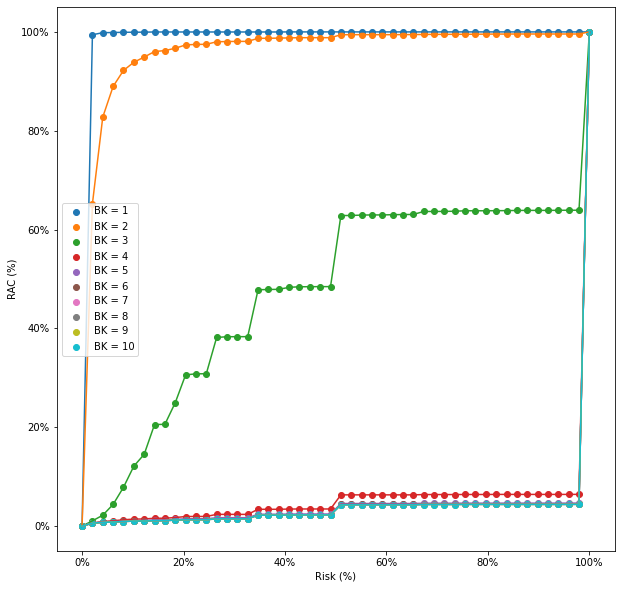

In [19]:
from risk_analysis import plot_rac
from matplotlib.pyplot import figure, subplot

figure(figsize=(10, 10))
g = subplot(1, 1, 1)

plot_rac(df, g)

### Feature-aware splitting

We plot all the different RAC curves for feature set:

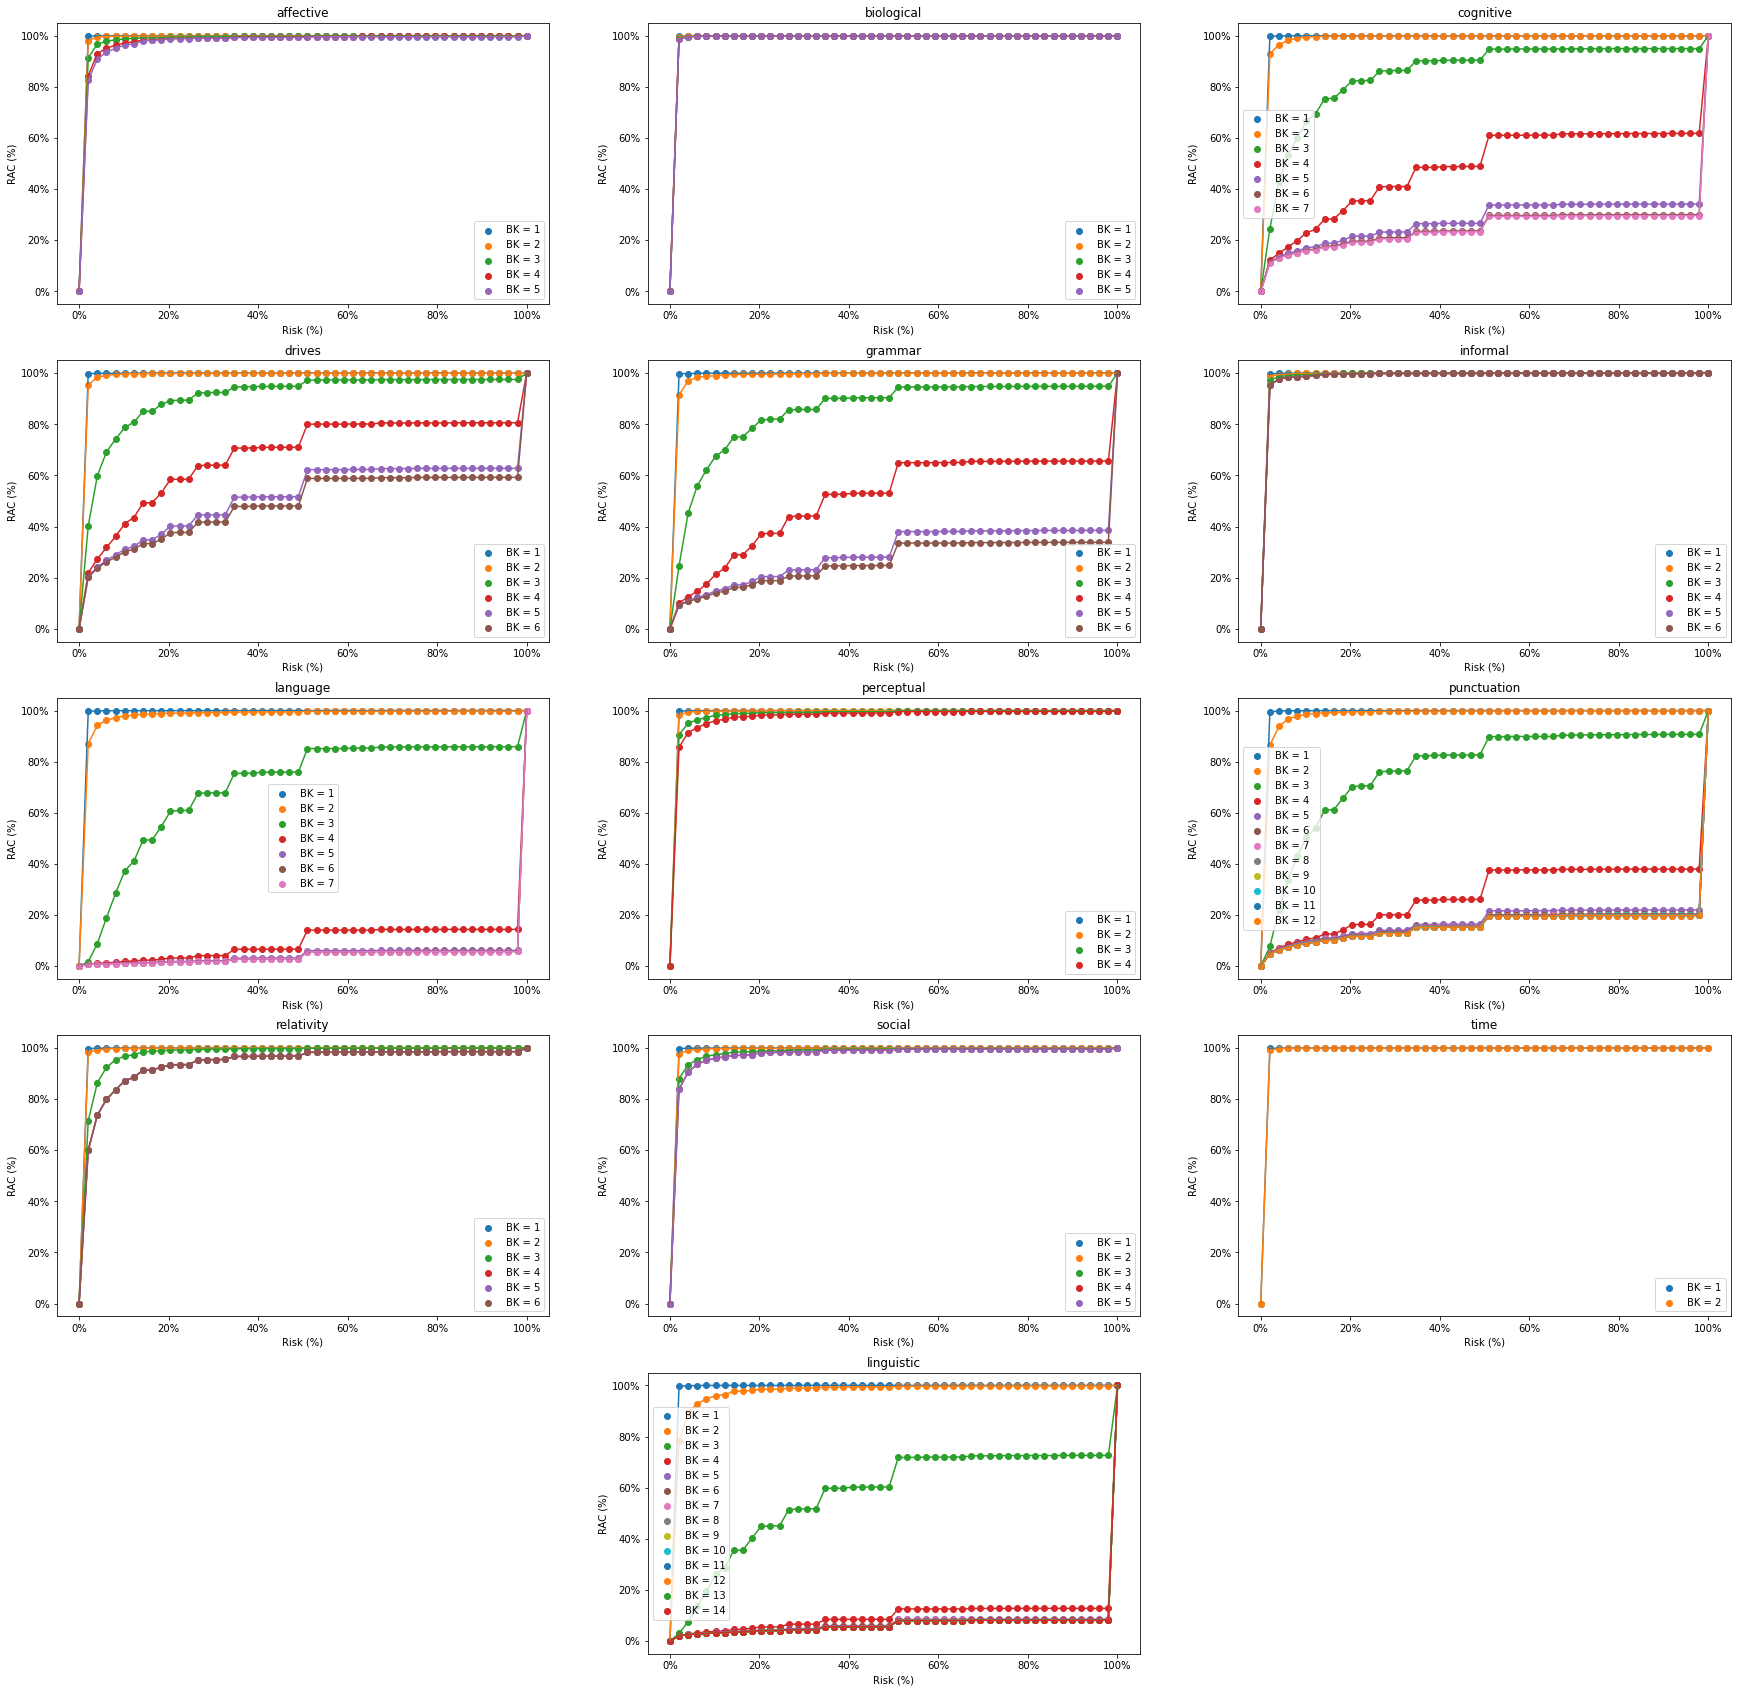

In [20]:
features = ["affective", "biological", "cognitive", "drives", "grammar", "informal", "language", "perceptual", "punctuation", "relativity", "social", "time"]

figure(figsize=(30, 30))

for j in range(len(features)):
    g = subplot(5, 3, j + 1)
    # Get input dataframe
    df = read_pickle(f"./datasets/risk_features/{features[j]}.pkl.bz2")
    # Set title
    g.set_title(features[j])
    # Plot graph
    plot_rac(df, g)
df = read_pickle("./datasets/risk_features/linguistic.pkl.bz2")
g = subplot(5, 3, 14)
g.set_title("linguistic")
plot_rac(df, g)